In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

In [2]:
title = "r = 0.1, b = 4, sp = 0.1, rprob = 0.01"
data_path = f"../data/fig7a.npz"
xlabel = "Time"
ylabel = "Offloading Metric"
tylabel = "Token Count"
colors = ['#0000ff', '#ff0000', '#ff9900', '#bfbfbf']
labels = ['offloaded by DQN', 'offloaded by MDP', 'offloaded by both', 'not offloaded']
length = 1000
seed = 3

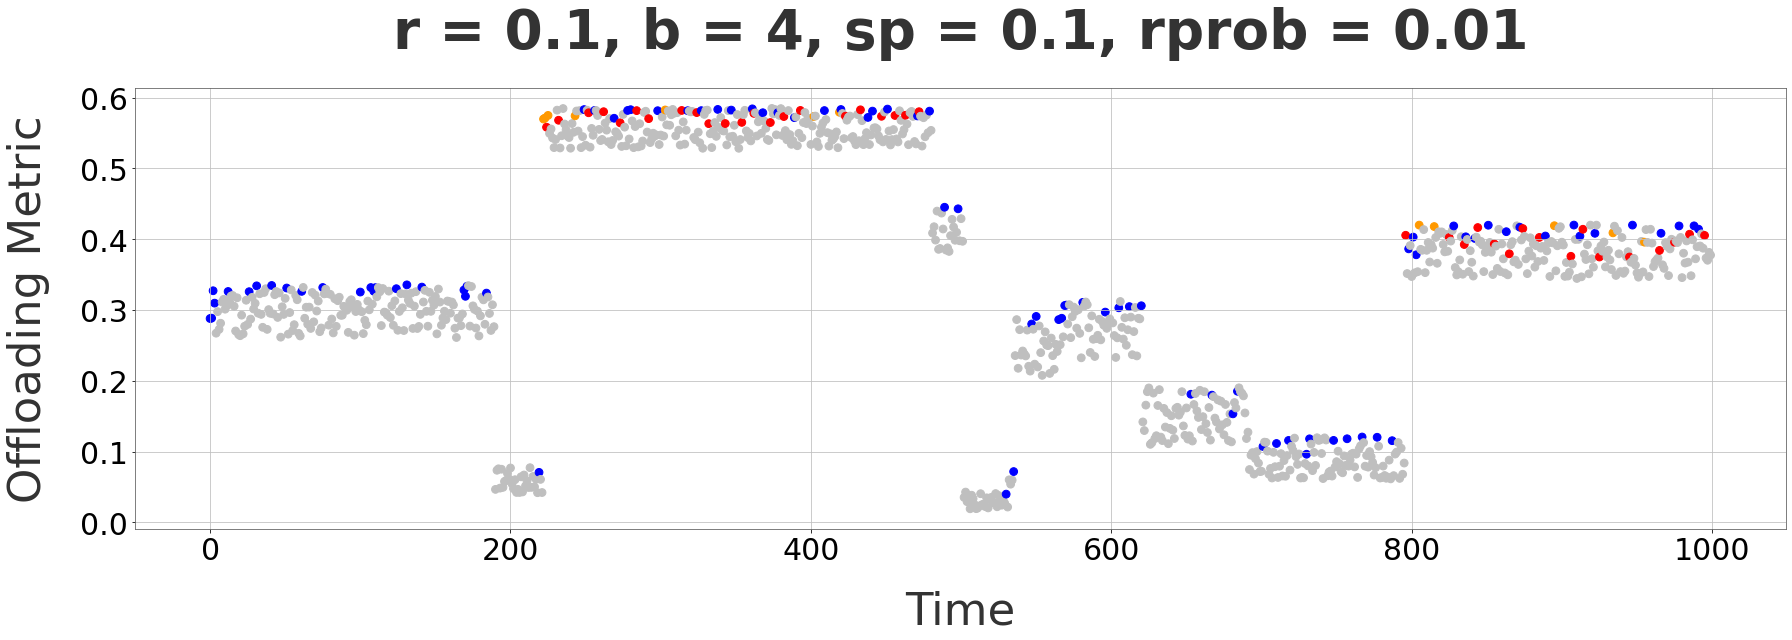

In [3]:
# Create the plot
plt.rc("font", family="DejaVu Sans")
plt.rcParams['figure.figsize'] = (25, 9)
fig, _ = plt.subplots()
ax = plt.subplot()

# Configure the subplot setting
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)
ax.yaxis.grid(True, color='#C0C0C0')
ax.xaxis.grid(True, color='#C0C0C0')
ax.spines['top'].set_color('#606060')
ax.spines['bottom'].set_color('#606060')
ax.spines['left'].set_color('#606060')
ax.spines['right'].set_color('#606060')
ax.set_title(title, color='#333333', fontsize=55, fontweight='bold', pad=40)
ax.set_xlabel(xlabel, labelpad=25, color='#333333', size=45)
ax.set_ylabel(ylabel, labelpad=30, color='#333333', size=45)

# Retrieve data from npz file
npz_data = np.load(data_path)
mdp_data, dqn_data, metric = npz_data['mdp_offload'], npz_data['dqn_offload'], npz_data['metric']
metric = metric*npz_data['std'] + npz_data['mean']
xdata = np.arange(length)
rstate = np.random.RandomState(seed)
ridx = rstate.randint(mdp_data.shape[0])
mdp_r, dqn_r, metric_r = mdp_data[ridx, :length].astype(np.int), dqn_data[ridx, :length].astype(np.int), metric[ridx, :length]
trace = 2*mdp_r+dqn_r
trace = trace - 1
trace[trace<0] = 3

# Plot the simulation data
color = [colors[t] for t in trace]
ax.scatter(xdata, metric_r, color=color, s=60)
plt.tight_layout()
plt.savefig(f'../pdf/Fig7a_trace.pdf', bbox_inches='tight')
plt.show()